<a href="https://colab.research.google.com/github/RidhaAnsar/Pima-Indians-Diabetes-DataAnalysis-Project/blob/main/DataAnalyticsUsingPython_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**Pima Indians Diabetes Database**

The objective is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# check for missing values
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
data.shape

(100000, 9)

this is the no of rows and columsn that we have in our dataset.

it has 100000 records with 9 different columns

In [ ]:
print(data['diabetes'].value_counts())


diabetes
0    91500
1     8500
Name: count, dtype: int64


people with diabetes are marked as 1 and the absence of diabetes are depicted as 0

from the above calculation we can evidently see that the people with diabetes are lesser than people without them.

In [ ]:
print(data['smoking_history'].value_counts())


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


this is the category of types of smokers as presented in the selected dataset.

**DATA** **VISUALIZATION**



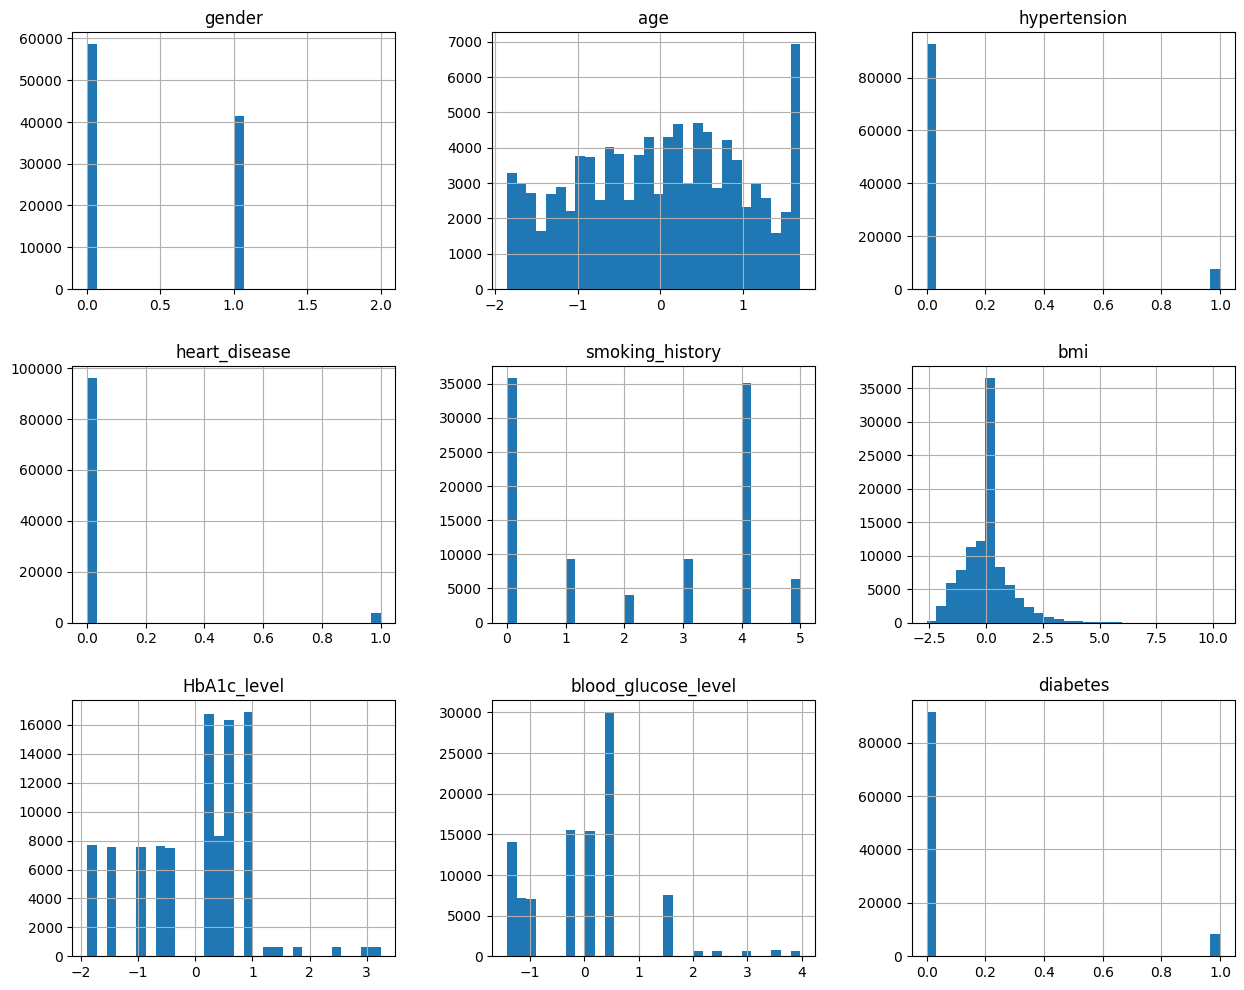

In [ ]:
data.hist(bins=30, figsize=(15,12))
plt.show()

this is some basic data visualizations done to understand the data better.

In [ ]:
# data analysis of patients of age above 50
over_50=data[data["age"]>50];
over_50.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
10,Female,53.0,0,0,never,27.32,6.1,85,0


Here we can see the data of patients above the age of 50, as they are more prone to diabetes.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Encode 'gender'
data['gender'] = le.fit_transform(data['gender'])  # Female -> 0, Male -> 1

# Encode 'smoking_history'
data['smoking_history'] = le.fit_transform(data['smoking_history'])
# Categories might be encoded as: never -> 0, former -> 1, current -> 2, etc.


In [ ]:
data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

#Heatmap

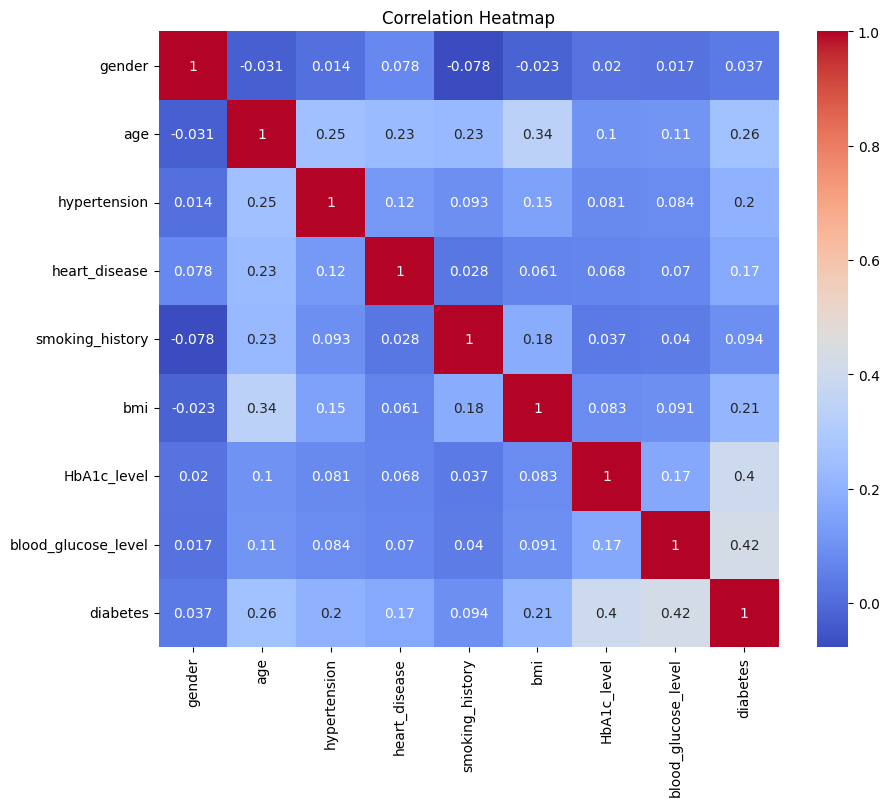

                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history     -0.077919  0.228608      0.093177       0.027598   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.077919 -0.022994     0.019957   
age                         0.228608  0.337396     0.101354   
hypertension                0.093177  0.147666     0.080939   
heart_disease              

In [ ]:
corr = data.corr()
figure_size = (10, 8)
plt.figure(figsize=figure_size)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print(corr)

this is the correlation heatmap. where we can see the only 2 columns with good correlation are HbA1c_level and blood_glucose_level.

Age also has a moderate correlation with diabetes, indicating that diabetes risk increases with age.

BMI has a moderate correlation with diabetes, reflecting that higher body mass index increases the likelihood of developing diabetes.

Gender, smoking history and heart disease doesn’t have a strong correlation with diabetes, suggesting it is not playing a dominant role.

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

**DATA PREPROCESSING**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


then i have used standar scaler to scale the useful columns

StandardScaler standardizes the data by removing the mean and scaling it to unit variance. This helps many machine learning algorithms perform better because they assume features are on a similar scale.

gender, hypertension, heart_disease, and smoking_history are already encoded as categorical features (0 and 1 or 0-4). These do not need scaling.

I haeve also decided to discard the gender, heart_disease, and smoking_history columsn as they are less relevant and may reduce the accuracy of the overall model.

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,0,1,4,-0.321056,1.001706,0.047704,0
1,0,0.538006,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,-0.616691,0,0,4,-0.000116,0.161108,0.489878,0
3,0,-0.261399,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,1.515058,1,1,1,-1.081970,-0.679490,0.416183,0


In [ ]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score

#splitting the data into train and test set
x = data.drop(['diabetes','smoking_history','heart_disease', 'gender'], axis=1)
y=data['diabetes']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

# model building
model=LogisticRegression()
model.fit(x_train, y_train)

# prediction
y_preds=model.predict(x_test)

# model evaluation
print(f'Accuracy: {accuracy_score(y_test, y_preds)}')
print(f'f1_score:{f1_score(y_test, y_preds)}')
print(classification_report(y_test, y_preds))

Accuracy: 0.9588
f1_score:0.717032967032967
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



the logistic regression model even though it is a
basic model give good accuracy of 95 perc. which means that the model correclty classifies the data 95 perc of the time

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Cross-Validation Score: {scores.mean()}')


Cross-Validation Scores: [0.96115 0.95995 0.9592  0.95995 0.9601 ]
Mean Cross-Validation Score: 0.96007


In [ ]:
# using randomforestclassification model

from sklearn.ensemble import RandomForestClassifier

#initialize the model
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

#predicting the model
y_preds2=rf.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_preds2)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_preds2))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.90      0.70      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.84      0.88     20000
weighted avg       0.97      0.97      0.97     20000



even better accuracy by random forest at 97 perc

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(x_train, y_train)
# Predict on the test set
y_pred = svm_model.predict(x_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.92      0.56      0.70      1708

    accuracy                           0.96     20000
   macro avg       0.94      0.78      0.84     20000
weighted avg       0.96      0.96      0.95     20000



almost same as logistic regression model

#Comparison of the Models

In [ ]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Make predictions for each model
y_pred_lr = model.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_svm = svm_model.predict(x_test)

# Create a dictionary to store the results
model_results = {}

# Calculate and store metrics for each model
for model_name, y_pred in zip(['Logistic Regression', 'Random Forest', 'SVM'], [y_pred_lr, y_pred_rf, y_pred_svm]):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  model_results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Convert the results to a DataFrame for easier viewing
results_df = pd.DataFrame(model_results).transpose()

# Print the results
print(results_df)


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression   0.95880   0.867110  0.611241  0.717033
Random Forest         0.96785   0.904943  0.696721  0.787297
SVM                   0.95865   0.923151  0.562646  0.699163


#Visualization of the Results

Logistic Regression Accuracy: 0.9588
Random Forest Accuracy: 0.96785
SVC Accuracy: 0.95865


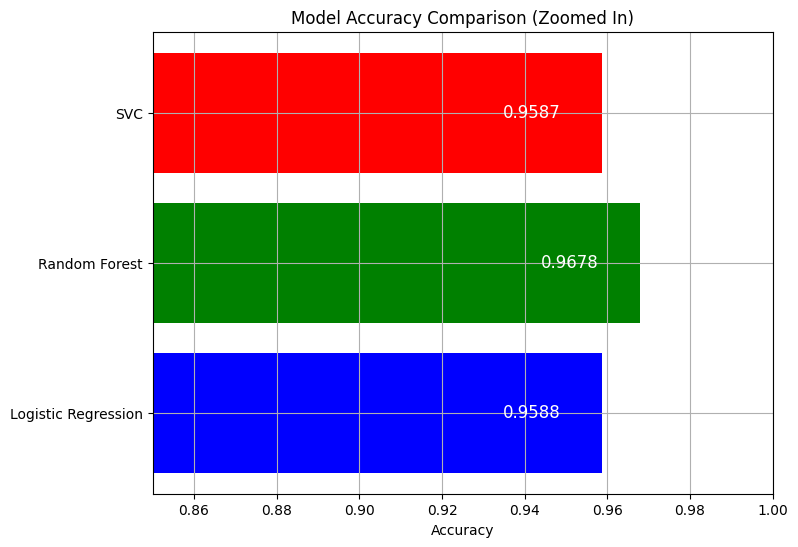

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have already split the data and trained the models:
# Logistic Regression (logistic_model), Random Forest (rf_model), SVC (svc_model)
# X_test: Your test data, y_test: True labels of the test data

# Make predictions for each model
y_pred_lr = model.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_svm = svm_model.predict(x_test)

# Calculate accuracy for each model
logistic_acc = accuracy_score(y_test, y_pred_lr)
rf_acc = accuracy_score(y_test, y_pred_rf)
svc_acc = accuracy_score(y_test, y_pred_svm)

# Print the accuracy scores
print(f"Logistic Regression Accuracy: {logistic_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"SVC Accuracy: {svc_acc}")

model_names = ['Logistic Regression', 'Random Forest', 'SVC']
accuracies = [logistic_acc, rf_acc, svc_acc]

# Create figure and axis objects
plt.figure(figsize=(8, 6))

# Create horizontal bar chart
bars = plt.barh(model_names, accuracies, color=['blue', 'green', 'red'])

# Add data labels to each bar (accuracy values)
for bar in bars:
    plt.text(bar.get_width() - 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', ha='right', color='white', fontsize=12)

# Set x-axis limits with a tighter range to zoom in on accuracy differences
plt.xlim(0.85, 1)  # Adjust as needed based on your accuracy range

# Add labels and title
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison (Zoomed In)')
plt.grid(True)

# Display the plot
plt.show()


#Inference and Conclusion

### Insights from the Graph:

1. **Model Performance Comparison**:
   - The **Random Forest** model performs slightly better than both the **Logistic Regression** and **SVC** models, with an accuracy of **0.9678**.
   - Both **SVC** and **Logistic Regression** models are very close in terms of accuracy, with **SVC** slightly lower at **0.9587** compared to **Logistic Regression's** **0.9588**.

2. **Difference in Accuracy**:
   - While the difference in accuracy between **Random Forest** and the other two models is noticeable, the accuracy difference between **SVC** and **Logistic Regression** is minimal (0.0001).
   - This indicates that, in your dataset, **Random Forest** might capture the underlying patterns better, while **SVC** and **Logistic Regression** are very similar in performance.

### Conclusion:

- The **Random Forest** model is likely the best-performing model based on accuracy for this specific dataset, showing a slightly higher predictive performance.
- Although **SVC** and **Logistic Regression** perform similarly, the choice between them may come down to other factors like interpretability, training time, or computational resources.
- If interpretability is important, **Logistic Regression** might be a preferred choice since it is easier to explain. However, if you are focusing purely on performance, **Random Forest** seems to be the best model for this problem.
